In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("Sample_Data",index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardizing the Variables 

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [6]:
scaled_feature = scaler.transform(data.drop('TARGET CLASS', axis=1))
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
data_feat = pd.DataFrame(scaled_feature, columns=data.columns[:-1])
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_feat, data['TARGET CLASS'],
                                                    test_size=0.30)

In [10]:
# Using KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

## Prediction and evaluation

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [46]:
print(confusion_matrix(y_test, pred ))

[[128  14]
 [  5 153]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       142
           1       0.92      0.97      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



## Choosing k value
appling multiple values for k to select the best one 

In [48]:
error_list = []
accuracy_score = []
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_list.append(np.mean(pred != y_test))
    score = cross_val_score(knn, data_feat, data['TARGET CLASS'], cv=10)
    accuracy_score.append(score.mean())
    error_rate.append(1-score.mean())


In [33]:
error_list[:3]

[0.10666666666666667, 0.11333333333333333, 0.08666666666666667]

Text(0, 0.5, 'Error Rate')

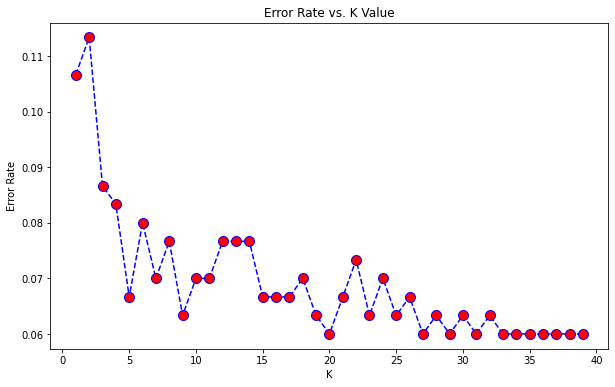

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Text(0, 0.5, 'Accuraty Score')

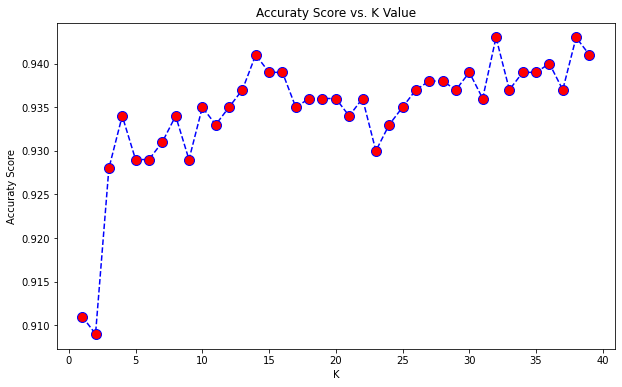

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_score,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

plt.title('Accuraty Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuraty Score')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [55]:
# Checking the confusion matrix and scores with k=1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1 \n\n')

print(confusion_matrix(y_test,pred),'\n\n')

print(classification_report(y_test,pred))

WITH K=1 


[[125  17]
 [ 15 143]] 


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       142
           1       0.89      0.91      0.90       158

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [56]:
# Checking the confusion matrix and scores with k=23

knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23 \n\n')

print(confusion_matrix(y_test,pred), "\n\n\n")

print(classification_report(y_test,pred))

WITH K=23 


[[128  14]
 [  5 153]] 



              precision    recall  f1-score   support

           0       0.96      0.90      0.93       142
           1       0.92      0.97      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300

